 # Objectif : Prédire la dangerosité d’une tumeur
  # arbre de décision vs  random forest


## Phase exploratoire

1. Importer vos librairies et votre dataset

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text

df = pd.read_csv('../datasets/breast-cancer-wisconsin.data')

2. Explorer votre dataset en affichant les informations descriptives relatives aux variables

In [3]:
df.columns = ['id','Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 
              'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
# j'essaie de trouver les valeurs manquantes/ nulles ou toutes autres données qui pourraient poser problème 
#df.isna().sum()
#df.isnull().sum()
#df.shape
df.loc[df["Bare Nuclei"] == "?","Bare Nuclei"] = 0
df= df.astype({"Bare Nuclei": int})
df= df.convert_dtypes()
#df = df.convert_objects(convert_numeric=True)

In [5]:
df["Bare Nuclei"].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           698 non-null    Int64
 1   Clump Thickness              698 non-null    Int64
 2   Uniformity of Cell Size      698 non-null    Int64
 3   Uniformity of Cell Shape     698 non-null    Int64
 4   Marginal Adhesion            698 non-null    Int64
 5   Single Epithelial Cell Size  698 non-null    Int64
 6   Bare Nuclei                  698 non-null    Int32
 7   Bland Chromatin              698 non-null    Int64
 8   Normal Nucleoli              698 non-null    Int64
 9   Mitoses                      698 non-null    Int64
 10  Class                        698 non-null    Int64
dtypes: Int32(1), Int64(10)
memory usage: 64.9 KB


In [6]:
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [7]:
# sns.pairplot(df)

In [8]:
df.shape

(698, 11)

Text(0, 0.5, 'fréquence')

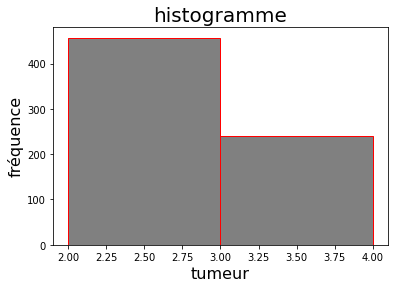

In [9]:
#visualisation des données
plt.hist(df.Class, bins=2, color = "gray", edgecolor = 'red')
plt.title('histogramme',fontsize = 20)
plt.xlabel('tumeur',fontsize = 16)
plt.ylabel('fréquence', fontsize = 16)
#ax = plt.axes()
#ax.xaxis.set_major_locator(MultipleLocator(2))

In [10]:
#vérifier la distribution absolue des catégories de tumeurs
df.Class.value_counts()

2    457
4    241
Name: Class, dtype: Int64

In [11]:
#la distribution relative des catégories de tumeurs
df.Class.value_counts(normalize=True)

2    0.654728
4    0.345272
Name: Class, dtype: Float64

3. Nous souhaitons réserver 390 observations pour l’entraînement et 297 pour le test, avec un échantillonnage qui respectent les proportions des classes dans les deux sous-ensembles (stratify)

In [12]:
X = df.drop("Class", axis=1)
y_series = df["Class"]
y = pd.DataFrame(y_series)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=300,random_state=1,stratify=df.Class)

In [13]:
#vérification des dimensions
y_train.shape , y_test.shape

((398, 1), (300, 1))

In [14]:
#vérification des distributions en apprentissage
y_train.value_counts(normalize=True)

Class
2        0.655779
4        0.344221
dtype: float64

In [15]:
#vérification des distributions en test
y_test.value_counts(normalize=True)

Class
2        0.653333
4        0.346667
dtype: float64

## Modélisation : arbre de décision

1. Instancier l’ arbre de décision avec deux paramètres suivants : 
     - un sommet n’est pas segmenté s’il est composé de moins de 30 individus
     - une segmentation est validée si et seulement si les feuilles générées comportent tous au moins 10 observations


In [16]:
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)

2. Entraîner votre modèle

In [17]:
arbreFirst.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

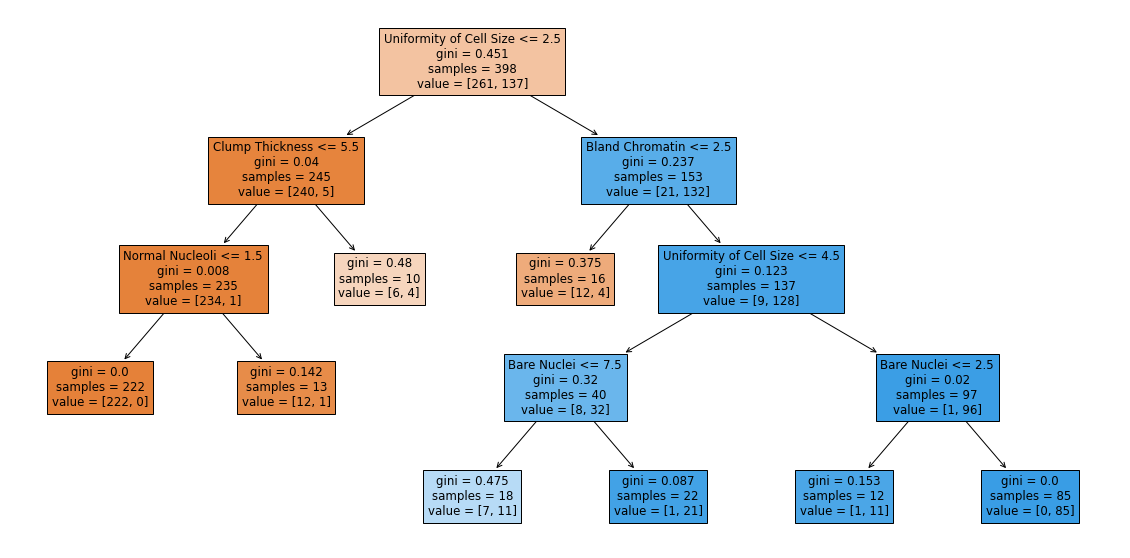

In [18]:
#affichage de l'arbre 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)
plt.show()

Interprétation : nous avons bien 8 feuilles dans l'arbre . Il produit donc 8 règles prédictives matérialisées par les chemins partant de la racine aux feuilles. Nous observons l’effectif de l’échantillon d’apprentissage sur la racine de l’arbre (nRacine = n = samples = 398) avec 261 ‘’benine et 138 ‘’maligne’’ .



Quelques remarques : 
  -      Les sommets sont teintés (c’est le rôle de l’option filled = True) selon la classe majoritaire qu’ils portent, avec plus ou moins d’intensité selon la concentration des effectifs. Ici, le bleu est 'maligne', l’orange 'benin’.
  -     Uniformity of cell size est la variable de segmentation sur la racine, avec la condition  ≤ 2.5
  -     Plus la valeur de l’indice de Gini est faible, plus les classes sont concentrées sur un sommet.
  -     Nous pouvons simplifier l’arbre en retirant les feuilles issues du même père qui portent des conclusions identiques. En procédant ainsi de bas en haut (bottom-up), nous effectuons un processus (simplifié) de post-élagage qui permet de réduire la taille de l’arbre sans modifier en aucune manière ses propriétés prédictives. (on verra ça plus bas) 



Une dernière Remarque : on pourrrait se dire que les variables discriminantes sont celles qui apparaissent dans les divisions optimales qui définissent l’arbre. Malheureusement, ce n’est pas le cas. En effet, lors de la construction de l’arbre , à chacune des étapes, la division choisie est celle qui maximise la variation d’hétérogénéité. Mais, il se peut qu’une autre division, impliquant la même ou une autre variable explicative, puisse avoir une variation d’hétérogénéité très proche de l’optimale, tout en étant inférieure. Ce sont ce que l’on appelle les variables cachées. Par conséquent, on s’aperçoit que déterminer les variables explicatives les plus “importantes” à partir de la lecture graphique de l’arbre est quasiment impossible. C’est la raison pour laquelle, on introduit la notion d’importance des variables, notion étroitement liée à un arbre

In [19]:
# importance des variables à l'aide de la méthode ’.feature_importances_’
impVarFirst={"Variable":df.columns[:-1],"Importance":arbreFirst.feature_importances_}
pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False)

,Variable,Importance
2,Uniformity of Cell Size,0.876897
7,Bland Chromatin,0.086712
1,Clump Thickness,0.019416
6,Bare Nuclei,0.016036
8,Normal Nucleoli,0.000939
0,id,0.000000
3,Uniformity of Cell Shape,0.000000
4,Marginal Adhesion,0.000000
5,Single Epithelial Cell Size,0.000000
9,Mitoses,0.000000


3. Réaliser les prédictions sur l'échantillon test

In [20]:
predFirst = arbreFirst.predict(X_test)
np.unique(predFirst,return_counts=True)

(array([2., 4.]), array([190, 110], dtype=int64))

La classe ‘benin’ a été assignée à 190 observations et 110 pour maligne. Est ce correct ?.  Pour le savoir, nous confrontons les classes observées et prédites via la matrice de confusion.

4. Afficher la matrice de confusion

In [23]:
#matrice de confusion
from sklearn import metrics
y_test = y_test.astype(int)
print(type(y_test))
print(type(predFirst))
print(metrics.confusion_matrix(y_test,predFirst))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[180  16]
 [ 10  94]]


5. afficher la précision et le rappel

In [24]:
#rapport de prédiction
print(metrics.classification_report(y_test, predFirst))

              precision    recall  f1-score   support

           2       0.95      0.92      0.93       196
           4       0.85      0.90      0.88       104

    accuracy                           0.91       300
   macro avg       0.90      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



Interprétation

 - le support. C'est le nombre d'éléments dans chacune des classes de l'échantillon de test.
 
 
 - precision : il est définit par $p = \frac{TP}{TP+FP}$ où TP = "true positives" = nombre d'éléments de la classe $k$ qui ont effectivement bien été prédits dans la classe $k$, et FP = "false positives" = nombre d'éléments qui n'étaient pas de la classe $k$ mais qui ont à tort été prédits en classe $k$. La précision est donc le rapport entre le nombre d'éléments correctement prédits comme classe $k$ et le nombre d'éléments total prédit comme $k$. Elle correspond à la pertinence de l'information remontée, mais ne s'intéresse pas à la quantité d'informations remontée : on aura peut être raté certains exemples de la classe $k$, qui auront été prédit dans une autre classe, mais tout ce qui a été prédit en classe $k$ est effectivement de la classe $k$, et donc pertinent.
 
 
 - recall : il est définit par $r = \frac{TP}{TP+FN}$ où TP = "true positives" = nombre d'éléments de la classe $k$ qui ont effectivement bien été prédit dans la classe $k$, et FN = "false negatives" = nombre d'éléments qui étaient vraiment de la classe $k$ mais qui ont été prédit comme une autre classe. Le rappel est donc le rapport entre le nombre d'éléments correctement prédits comme classe $k$ et le nombre total d'éléments qui sont vraiment de la classe $k$ et qui auraient dû être prédits en $k$. Cela correspond à la quantité d'information effectivement remontée : même si l'on fait beaucoup d'erreur en prédisant en classe $k$ des exemples qui n'appartiennent pas à cette classe, on n'aura raté aucun exemple de la classe $k$.
 
 
 - f1-score : le f1-score est la moyenne harmonique de la précision et du rappel, et il baisse si l'une des deux mesures baisse. On pourra retenir $f1 = 2 \frac{p \times r }{p+r}$. Toutes ces mesures valent pour une classe donnée $k$. Pour en faire une mesure globale, on peut moyenner les précisions / rappels pour chacune des classes (c'est le macro average), ou pondérer cette moyenne par la taille du support (weighted avg).

- accuracy, qui est une mesure globale qui correspond au nombre moyen d'exemples correctement prédits. C'est la mesure la plus simple, mais attention, la plus trompeuse lorsqu'il y a beaucoup de classes dans un modèle 


### Pour Aller plus loin 

Modification des paramètres d’apprentissage

Notre arbre paraît tout de même surdimensionné. En effet on remarque   que plusieurs feuilles issues du même sommet père portent  des conclusions identiques. L'idée est donc d'introduire  un nouveau paramètre pour réduire la taille de l’arbre.
On peut spécifier le nombre de noeud (max_leaf_nodes = 3) c.-à-d. dans notre cas un arbre qui produit 3 règles au maximum. Dixit  la méthode qui suit effectue en priorité les segmentations qui maximisent les contributions.


[Text(0.4, 0.8333333333333334, 'Uniformity of Cell Size <= 2.5\ngini = 0.451\nsamples = 398\nvalue = [261, 137]'),
 Text(0.2, 0.5, 'gini = 0.04\nsamples = 245\nvalue = [240, 5]'),
 Text(0.6, 0.5, 'Bland Chromatin <= 2.5\ngini = 0.237\nsamples = 153\nvalue = [21, 132]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.123\nsamples = 137\nvalue = [9, 128]')]

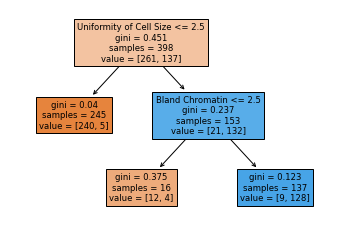

In [25]:
#modifions les paramètres d'apprentissage
arbreSecond = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,max_leaf_nodes=3)
#construction de l'arbre
arbreSecond.fit(X_train, y_train)
#affichage graphique de l'arbre
plot_tree(arbreSecond,feature_names = list(df.columns[:-1]),filled=True)


L’arbre est fortement simplifié et maintient ses qualités prédictives ! Vérifions le :


In [26]:
#prédiction sur l'échantillon test
predSecond = arbreSecond.predict(X_test)
#matrice de confusion
print(metrics.confusion_matrix(y_test,predSecond))


[[180  16]
 [ 10  94]]


On obtient bien la même matrice de confusion !!

## Modélisation : RandomForest 

1. Implémenter & entraîner le modèle de random forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier
X_trainF, X_testF, y_trainF, y_testF = train_test_split(X, y,test_size=300,random_state=1,stratify=df.Class)
rf = RandomForestClassifier(n_estimators = 100, bootstrap = True)

quelques remarques :

-     vous pouvez jouer avec le nombre d'arbres à l'aide du paramètre n_estimators
-     le paramètre boostrap : Plutôt qu’utiliser toutes les données pour construire les arbres. On choisit pour chaque arbre aléatoirement un sous-ensemble (avec répétition possibles) des données. en d'autres termes, on fait en sorte que les arbres soient décorrélées. cela permet de réduire la variance des prévisions. Pour en savoir plus : https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
-    il est également possible de jouer sur le nombre de noeuds de chaque arbre avec max_leaf_nodes



3. entrainer le modèle

In [28]:
rf.fit(X_trainF, y_trainF) 

C:\Users\Pontiff\AppData\Local\Temp/ipykernel_22340/1471628387.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainF, y_trainF)


RandomForestClassifier()

In [29]:
from sklearn.metrics import classification_report
y_testF = y_testF.astype(int)
print(classification_report(y_testF, rf.predict(X_testF)))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       196
           4       0.93      0.96      0.95       104

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [30]:
print(metrics.confusion_matrix(y_testF,rf.predict(X_testF)))

[[189   7]
 [  4 100]]


### Pour aller plus loin 

Un ptt tuto qui pourrait vous aider à y voir plus clair
https://www.datacamp.com/community/tutorials/random-forests-classifier-python

-  Dans les forêts aléatoires, il n'est pas nécessaire de procéder à une validation croisée ou à un ensemble de test séparé pour obtenir une estimation non biaisée de l'erreur de l'ensemble de test. Il est estimé en interne, lors de l'exécution c'est ce qu'on appelle l'oob_error . C'est une méthode de détermination de l'erreur de prédiction qui permet à la forêt aléatoire d'être adaptée et validée tout en étant entraînée.
https://www.quora.com/What-is-the-out-of-bag-error-in-Random-Forest-algorithm


- Il est impossible d’analyser la multitude d’arbres pour évaluer l’influence des variables prédictives dans la modélisation, c'est pourquoi on utilise 'feature importance'

In [31]:
impVarRF={"Variable":df.columns[:-1],"Importance":rf.feature_importances_}
pd.DataFrame(impVarRF).sort_values(by="Importance",ascending=False)

,Variable,Importance
2,Uniformity of Cell Size,0.291843
3,Uniformity of Cell Shape,0.195412
6,Bare Nuclei,0.143103
7,Bland Chromatin,0.119917
8,Normal Nucleoli,0.084433
5,Single Epithelial Cell Size,0.064292
4,Marginal Adhesion,0.040500
1,Clump Thickness,0.039685
0,id,0.013542
9,Mitoses,0.007272
